In [5]:
%matplotlib nbagg
%pylab
import seaborn as sns

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Cruzando al otro lado

Tenemos una grilla de 10 celdas por 10 celdas como la que se ve en la figura de abajo.

La consigna es encontrar un camino pintado de negro que conecte el borde inferior con el superior.Sólo se está permitido moverse en direcciones arriba / abajo, o izquierda / derecha. 

En el ejemplo de abajo, se puede ver una solución con línea roja punteada

La pregunta es: **Si el color de cada celda está elegida al azar, cual es la probabilidad de que podamos llegar de un lado al otro?**

La siguiente pregunta es **Como cambia nuestra respuesta si en lugar de ser 50% negro / 50% blanco, fuera 30% negro / 70% blanco**. En general, como depende en función de de la probabilidad del negro

<IPython.core.display.Javascript object>


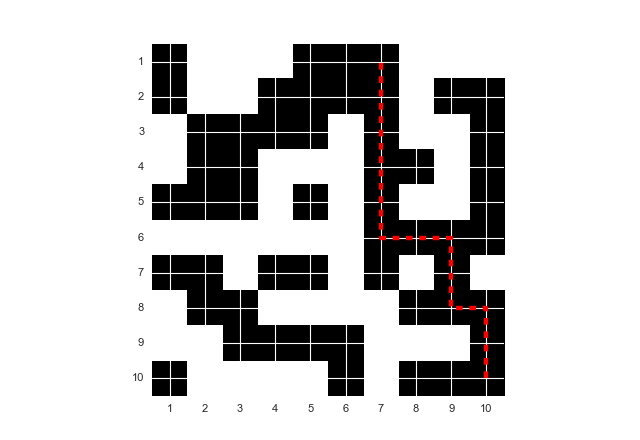

In [161]:
import numpy as np

def sample_grid(size, threshold=0.5, seed=None):
    rnd = np.random.RandomState(seed) if seed else np.random
    return rnd.random_sample((size, size)) < threshold

figure()
imshow(sample_grid(10, seed=42), interpolation='nearest')
xticks(range(10), range(1, 11))
yticks(range(10), range(1, 11))
plot([9, 9, 8, 8, 6, 6], [9, 7, 7, 5, 5, 0], 'r--', lw=4)


# Manos a la masa

Para eso programe brevemente el algoritmo que calcula si existe el camino. 

El algoritmo lo que hace es ver si existe un camino para cada uno de los puntos de partida posibles. Luego se fija si en alguno de ellos hubo efectivamente un camino

In [139]:
def exists_path(m):
    """
    Devuelve True si existe un camino de un lado al otro
    """
    current = m[0]
    for row in m:
        current = current & row    
        expand(current, row, 1)
        expand(current, row, -1)
    return current.any()

def expand(mask, row, direction):
    """
    Helper function, expande la mascara `mask` usando los valores de `row` en la direccion establecida por `direction`
    Los valores para `direction` son +1 o -1
    """
    already_covered = -1
    for idx in sorted(find(mask), key=lambda x: - direction * x):
        i = idx
        while i != already_covered and i > 0 and i < len(row) and row[i]:
            mask[i] = True
            i += direction
        already_covered = idx


# Midiendo
Con el algoritmo en la mano, ahora podemos ver como se comporta.

Me no sabria a priori como cambian estas dinamicas a medida que cambiamos el tamaño de la grilla. Vamos a ver que pasa

In [163]:
from tqdm import tqdm

def get_experiment_data(grid_size=10, sample_size=100, thresholds=None):
    x = thresholds if thresholds is not None else linspace(0, 1)
    y = []
    for t in tqdm(x):
        y.append(np.sum([exists_path(sample_grid(grid_size, t))  for _ in xrange(sample_size)]))
    return x, y

def experiment(grid_size=10, sample_size=100, thresholds=None):
    x, y = get_experiment_data(grid_size=10, sample_size=100, thresholds=None)
    figure()
    plot(x, y, '-o')
    xlabel('Probabilidad que salga cara')
    ylabel('Cantidad de grillas que tenian un camino')
    title('Resultado experimento para grillas {g}x{g}'.format(g=grid_size))
    grid()

# Experimento 1: en la grilla de 10 x 10
Podemos ver algo notable. Por debajo de 40% de probabilidad de negro, las chances de que haya un camino son nulas.

En la region entre 40% y 80% pasa de ser imposible a ser 100% probable.

Es muy interesante este problema como analogía a las innumerables veces en la historia de la humanidad, cuando todavía no globalizada, las mismas ideas emergian de forma independiente. 

100%|██████████| 50/50 [00:09<00:00,  3.08it/s]


<IPython.core.display.Javascript object>


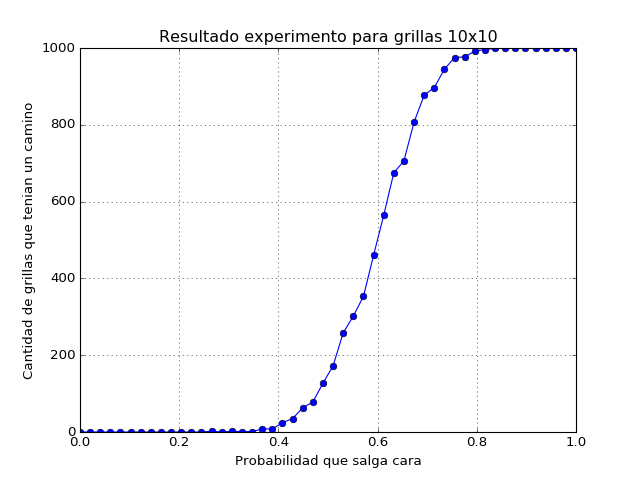

In [149]:
experiment(sample_size=1000)

# Experimento 2: Agrandando la grilla
Qué pasa cuando agrandamos la grilla?

El intervalo de accion se hace más abrupto. Muy interesante!

100%|██████████| 50/50 [00:38<00:00,  2.12s/it]


<IPython.core.display.Javascript object>


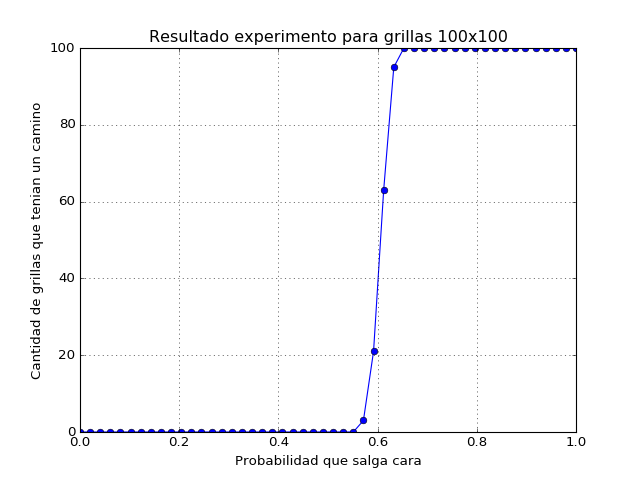

100%|██████████| 50/50 [00:31<00:00,  1.36s/it]


<IPython.core.display.Javascript object>


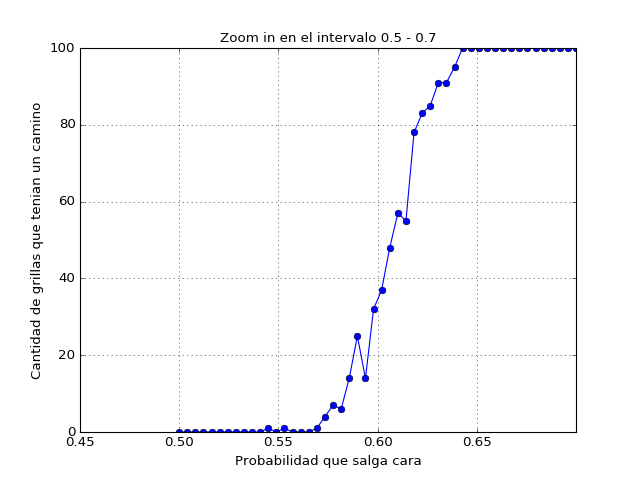

In [156]:
experiment(grid_size=100)
experiment(grid_size=100, thresholds=np.linspace(0.5, 0.7))
title('Zoom in en el intervalo 0.5 - 0.7')